## To visualize "interactions" (centered relative efficiencies) as heatmaps using Seaborn

python 3 codes  
jupyter=1.0.0; pandas=1.1.5; matplotlib=3.3.1; numpy=1.19.4; seaborn=0.11.0; ipython=7.19.0;

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# For showing images
from IPython.display import Image

In [2]:
# to set color code: make a palette that blends between a list of colors.
YZ_RdWWWBu9 = sns.blend_palette(["#053061", "#2166ac", "#92c5de", "#FFFFFF",
                                 "#FFFFFF",
                                 "#FFFFFF", "#f4a582", "#b2182b", "#67001f"],
                                n_colors=200, as_cmap=True)

### Heatmaps of interactions in WT or mutants

In [3]:
# Load heatmap values, generated by <6-lib_fig.R>
mtx_folder = "/Users/xxxx/Documents/Txn/3-TSS_sequence_library/9-DTmerge_analysis/7-poolDs_cmbTs/6-ct4-itr_centered/"

pol = 'WT' # G1097D, E1103G, WT, F1086S, H1085Q
t = True # WT,G1097D,H1085Q need transpose() for figures

if t:
    print('transpose()')
    all_itr = pd.read_csv(mtx_folder+pol+"-All_itr-median-centered_pos_base.csv", index_col=0).transpose()
else:
    print('no transpose()')
    all_itr = pd.read_csv(mtx_folder+pol+"-All_itr-median-Centered_pos_base.csv", index_col=0)
#all_itr

transpose()


-t.svg


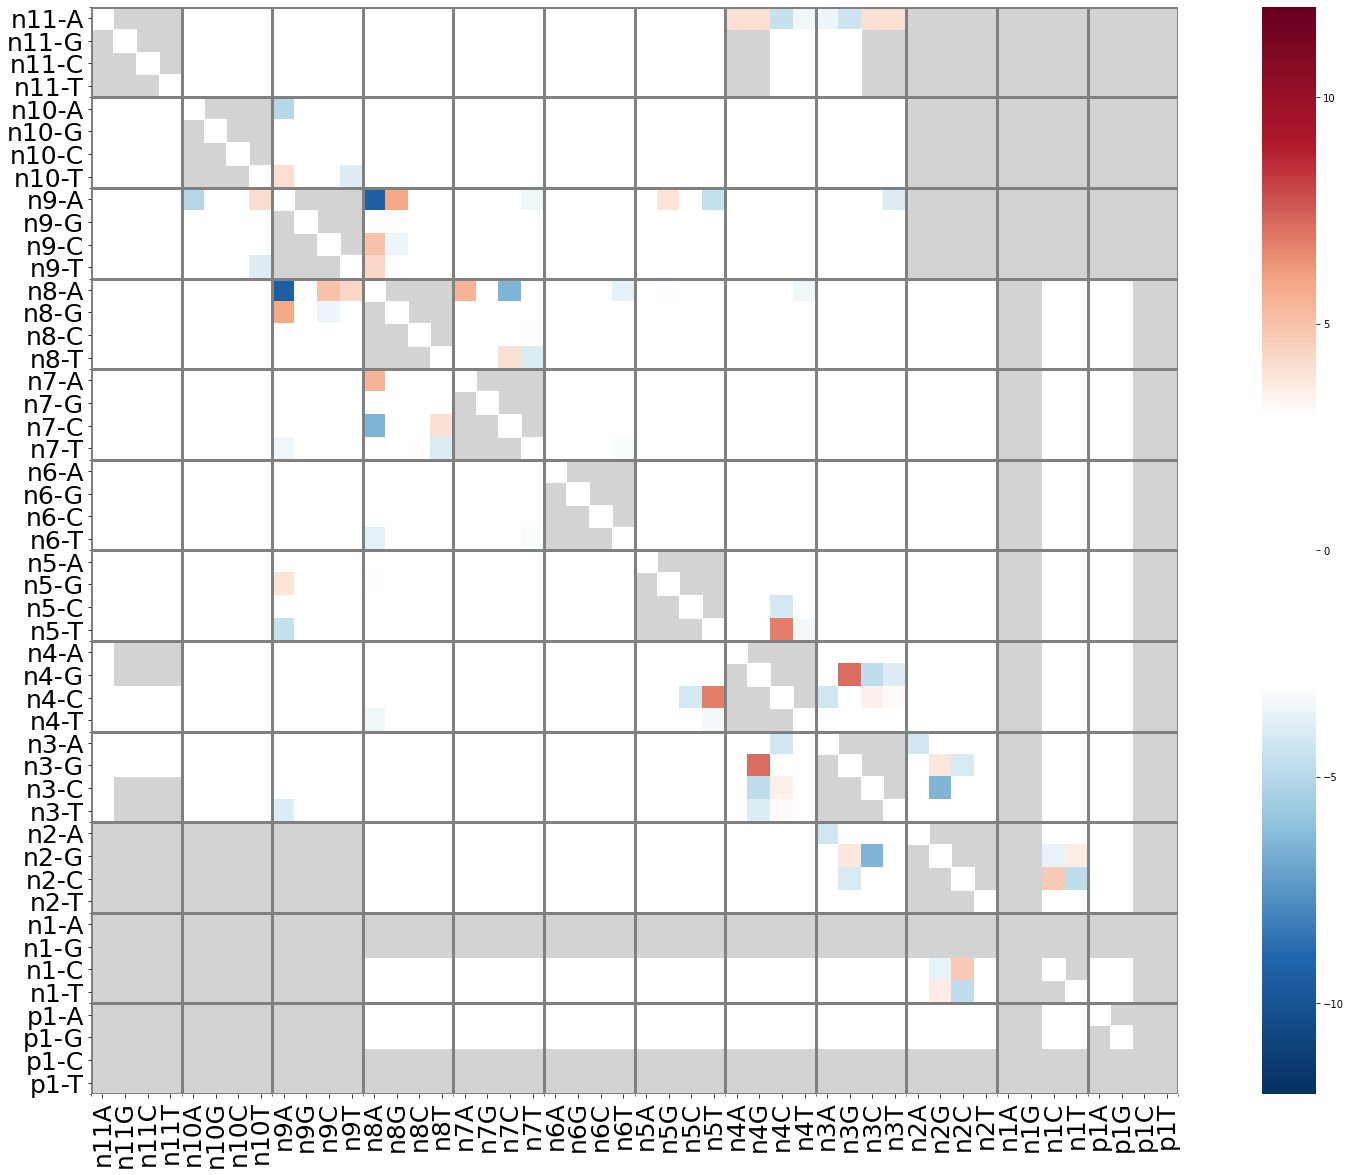

In [4]:
## generate heatmap using seaborn.heatmap()
minor_ticks = np.arange(0, 4*13, 4)

fig, ax = plt.subplots(1,1, figsize=[30,20])
sns.heatmap(all_itr,
            vmin=-12, vmax=12,
            center=0,
            cmap=YZ_RdWWWBu9,
            annot=False, square=True)
ax.tick_params(labelsize=25)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', axis='both', linewidth=3, color='grey')
ax.set_facecolor('lightgrey') # set color for missing value

if t:
    print('-t.svg')
    plt.savefig(mtx_folder+pol+"-All_itr-median-Centered_pos_base-t.svg")
else:
    print('.svg')
    plt.savefig(mtx_folder+pol+"-All_itr-median-Centered_pos_base.svg")

### Heatmaps showing Pol II mutant effects on interactions, as determinied by substracting cetered relative efficiency in WT from that in mutants

In [5]:
# Load heatmap values, generated by <6-lib_fig.R>
mtx_folder = "/Users/xxxx/Documents/Txn/3-TSS_sequence_library/9-DTmerge_analysis/7-poolDs_cmbTs/6-ct4-itr_centered/"
wt = pd.read_csv(mtx_folder+"WT-All_itr-median-centered_pos_base.csv", index_col=0)

pol = 'E1103G'
mut = pd.read_csv(mtx_folder+pol+"-All_itr-median-centered_pos_base.csv", index_col=0)

if pol in ['G1097D', 'H1085Q']:
    t=True # G1097D and H1085Q need transpose() for figures
    mut_wt = (mut-wt).transpose()
    print('transpose()')
elif pol in ['E1103G', 'F1086S']:
    t=False
    mut_wt = mut-wt
    print('no transpose()')

no transpose()


.svg


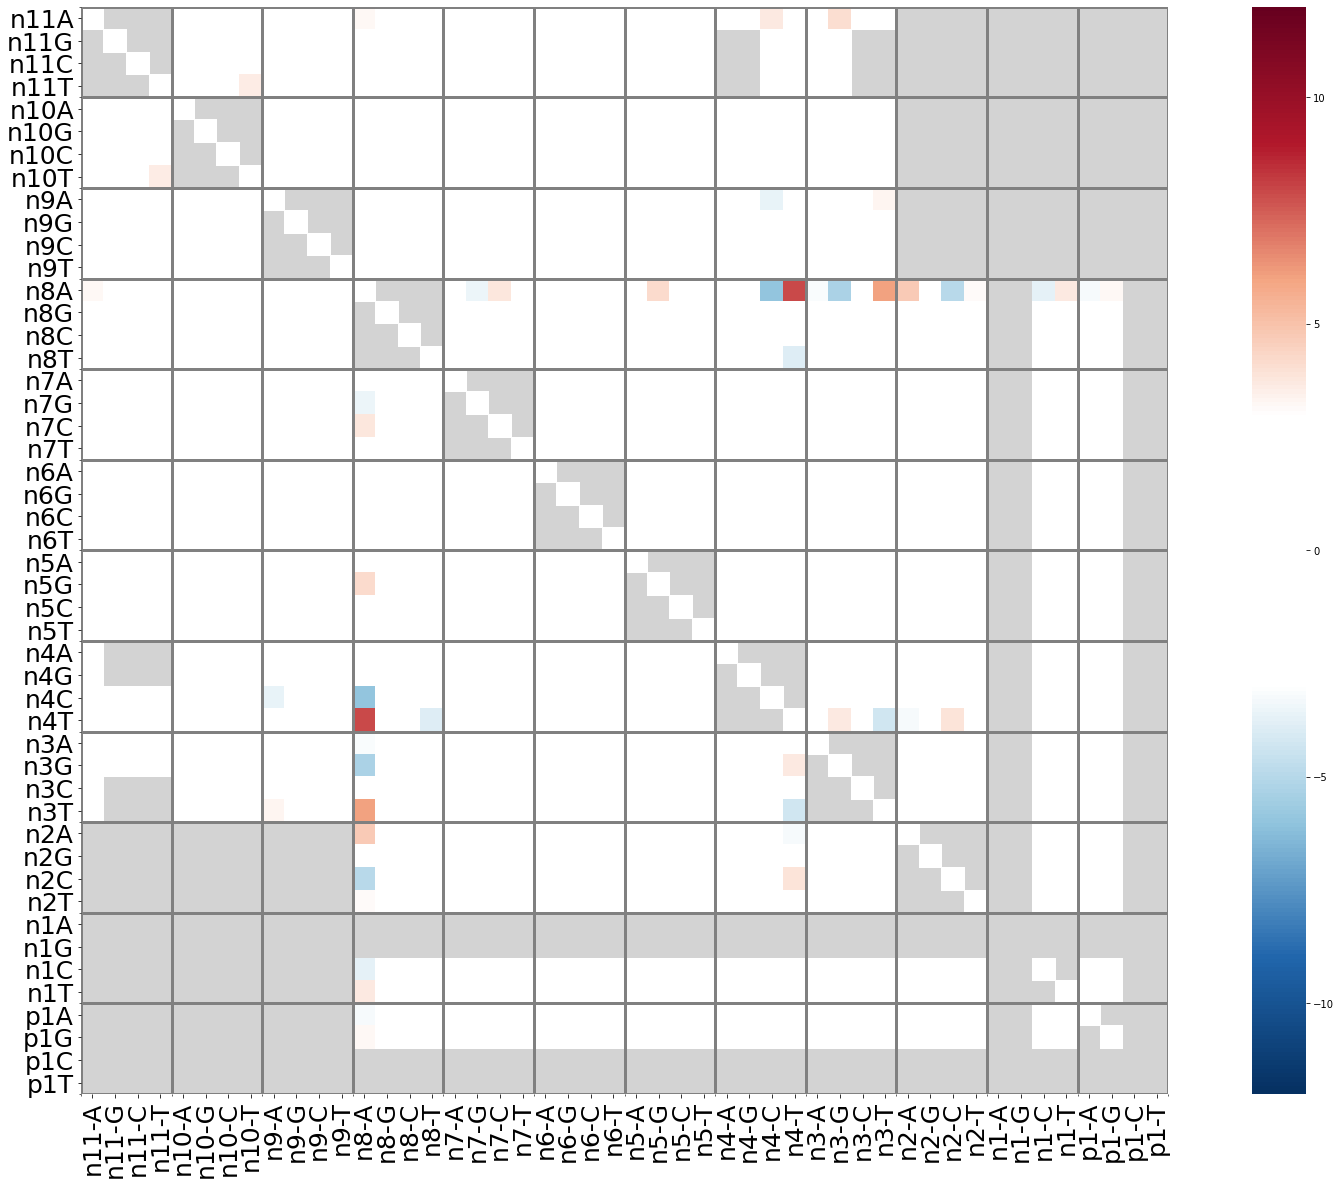

In [8]:
## generate heatmap using seaborn.heatmap()
minor_ticks = np.arange(0, 4*13, 4)

fig, ax = plt.subplots(1,1, figsize=[30,20])
sns.heatmap(mut_wt,
            vmin=-12, vmax=12,
            center=0,
            cmap=YZ_RdWWWBu9,
            annot=False, square=True)
ax.tick_params(labelsize=25)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', axis='both', linewidth=3, color='grey')
ax.set_facecolor('lightgrey') # set color for missing value

if t:
    print('-t.svg')
    plt.savefig(mtx_folder+pol+"_WT_diff-All_itr-median-centered_pos_base-t.svg")
else:
    print('.svg')
    plt.savefig(mtx_folder+pol+"_WT_diff-All_itr-median-centered_pos_base.svg")